Implementing K-Means Clustering on Customer Segments

Task: Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. 

Visualize the resulting clusters.


In [28]:
import pandas as pd
df=pd.read_csv('Mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Genre']= encoder.fit_transform(df['Genre'])

In [31]:
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]
# y= df['species'].values

In [32]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
standardized_features=scaler.fit_transform(X)


In [33]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
kmean.fit(standardized_features)
identified_clusters = kmean.predict(standardized_features)

Text(0.5, 1.0, 'K-Means Clustering')

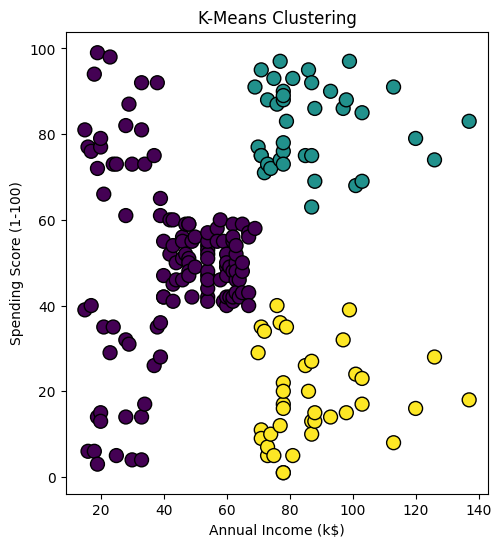

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=identified_clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')




Optimal Number of Clusters: Elbow Method and Silhouette Score

Task: Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset. 

Discuss the criteria for selecting the number of clusters.


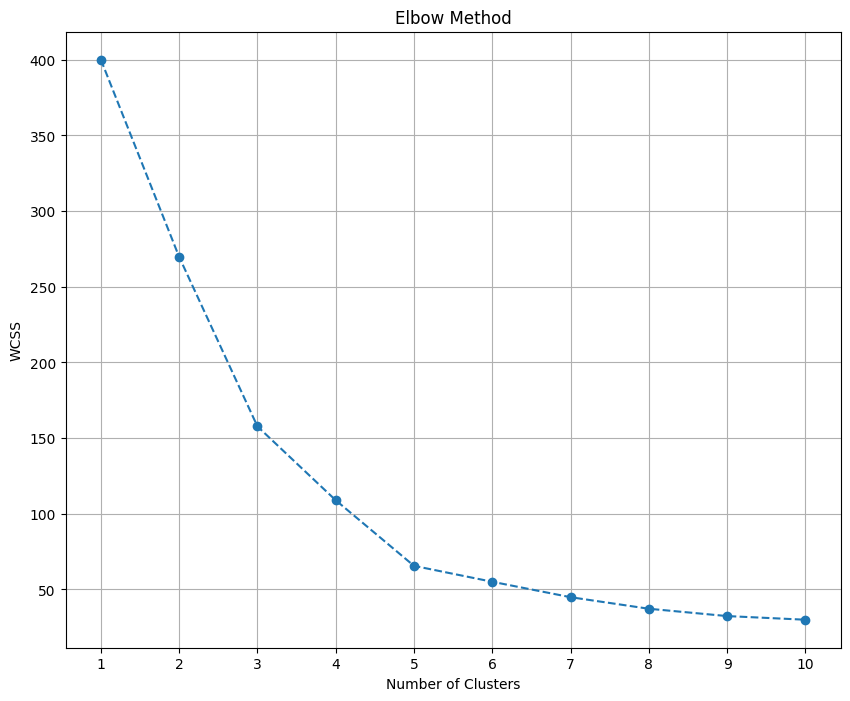

In [35]:
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmean.fit(standardized_features)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

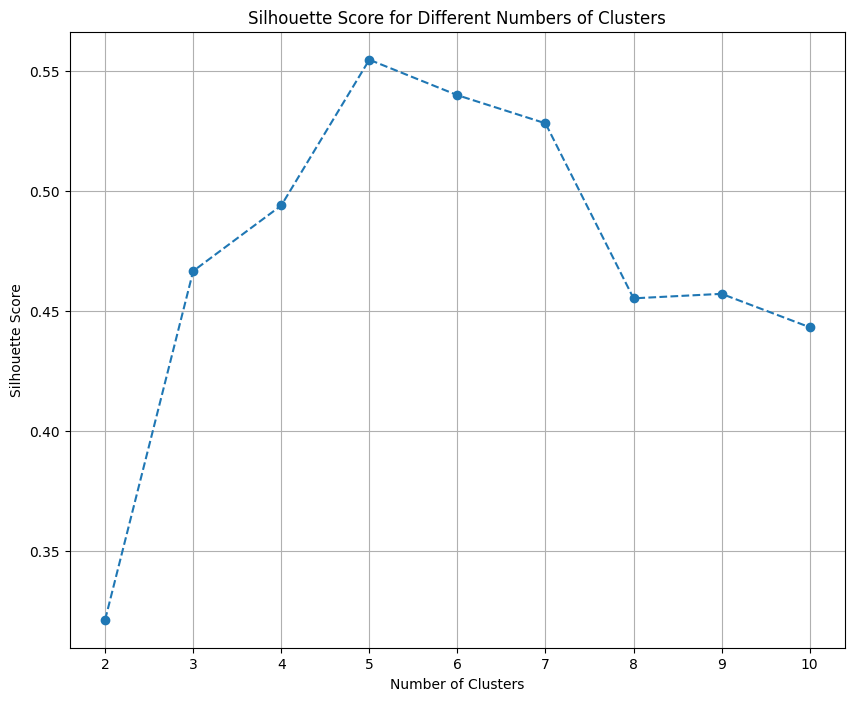

In [36]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmean.fit(standardized_features)
    labels = kmean.labels_
    score = silhouette_score(standardized_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()
